<a href="https://colab.research.google.com/github/khuloodnasher/Bitcoin-Prediction/blob/main/Bitcoin_30day_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
### Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/BTC-USD.csv', encoding= 'ISO-8859-1')


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
1,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664996
2,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
3,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481031
4,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271274


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2020-12-27,26439.373047,28288.839844,25922.769531,26272.294922,26272.294922,66479895605
363,2020-12-28,26280.822266,27389.111328,26207.640625,27084.808594,27084.808594,49056742893
364,2020-12-29,27081.810547,27370.720703,25987.298828,27362.437500,27362.437500,45265946774
365,2020-12-30,27360.089844,28937.740234,27360.089844,28840.953125,28840.953125,51287442704
366,2020-12-31,28591.214844,29244.750000,28591.214844,28790.310547,28790.310547,47452475392


In [6]:

df1=df.reset_index()['Close']
df1

0       7193.599121
1       7200.174316
2       6985.470215
3       7344.884277
4       7410.656738
           ...     
362    26272.294922
363    27084.808594
364    27362.437500
365    28840.953125
366    28790.310547
Name: Close, Length: 367, dtype: float64

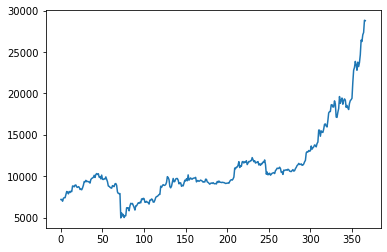

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [9]:
print(df1)

[[0.09312089]
 [0.09339635]
 [0.08440168]
 [0.09945873]
 [0.10221415]
 [0.10224183]
 [0.11723552]
 [0.1337613 ]
 [0.1302494 ]
 [0.12183758]
 [0.13388119]
 [0.12847626]
 [0.1349679 ]
 [0.13294446]
 [0.16158148]
 [0.16071203]
 [0.15722548]
 [0.16582416]
 [0.16640105]
 [0.15649062]
 [0.1544545 ]
 [0.15815167]
 [0.15542783]
 [0.14393397]
 [0.14556441]
 [0.14231404]
 [0.15190687]
 [0.16501902]
 [0.1838195 ]
 [0.18206166]
 [0.19012039]
 [0.18348182]
 [0.18525582]
 [0.18322358]
 [0.18109357]
 [0.17637812]
 [0.19449533]
 [0.19937079]
 [0.20214168]
 [0.20503968]
 [0.21557814]
 [0.20468326]
 [0.21941399]
 [0.22434979]
 [0.21967137]
 [0.22376586]
 [0.20605793]
 [0.20794349]
 [0.19770934]
 [0.21663897]
 [0.19533165]
 [0.19428804]
 [0.19755428]
 [0.19657985]
 [0.207528  ]
 [0.19603495]
 [0.18311214]
 [0.16127808]
 [0.15976873]
 [0.15507505]
 [0.15201909]
 [0.15046674]
 [0.16333703]
 [0.15990665]
 [0.15854344]
 [0.17209662]
 [0.17393084]
 [0.16502467]
 [0.13143303]
 [0.1237049 ]
 [0.12312196]
 [0.12

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(238, 129)

In [12]:
train_data

array([[0.09312089],
       [0.09339635],
       [0.08440168],
       [0.09945873],
       [0.10221415],
       [0.10224183],
       [0.11723552],
       [0.1337613 ],
       [0.1302494 ],
       [0.12183758],
       [0.13388119],
       [0.12847626],
       [0.1349679 ],
       [0.13294446],
       [0.16158148],
       [0.16071203],
       [0.15722548],
       [0.16582416],
       [0.16640105],
       [0.15649062],
       [0.1544545 ],
       [0.15815167],
       [0.15542783],
       [0.14393397],
       [0.14556441],
       [0.14231404],
       [0.15190687],
       [0.16501902],
       [0.1838195 ],
       [0.18206166],
       [0.19012039],
       [0.18348182],
       [0.18525582],
       [0.18322358],
       [0.18109357],
       [0.17637812],
       [0.19449533],
       [0.19937079],
       [0.20214168],
       [0.20503968],
       [0.21557814],
       [0.20468326],
       [0.21941399],
       [0.22434979],
       [0.21967137],
       [0.22376586],
       [0.20605793],
       [0.207

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [14]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [15]:
print(X_train.shape), print(y_train.shape)

(137, 100)
(137,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(28, 100)
(28,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
3/3 [==============================] - 6s 781ms/step - loss: 0.0331 - val_loss: 0.2075
Epoch 2/100
3/3 [==============================] - 1s 176ms/step - loss: 0.0040 - val_loss: 0.0380
Epoch 3/100
3/3 [==============================] - 1s 168ms/step - loss: 0.0063 - val_loss: 0.0938
Epoch 4/100
3/3 [==============================] - 1s 173ms/step - loss: 0.0015 - val_loss: 0.1635
Epoch 5/100
3/3 [==============================] - 1s 171ms/step - loss: 0.0026 - val_loss: 0.1747
Epoch 6/100
3/3 [==============================] - 1s 175ms/step - loss: 0.0028 - val_loss: 0.1429
Epoch 7/100
3/3 [==============================] - 1s 174ms/step - loss: 0.0015 - val_loss: 0.1068
Epoch 8/100
3/3 [==============================] - 1s 175ms/step - loss: 0.0015 - val_loss: 0.0941
Epoch 9/100
3/3 [==============================] - 1s 180ms/step - loss: 0.0016 - val_loss: 0.1054
Epoch 10/100
3/3 [==============================] - 1s 179ms/step - loss: 0.0012 - val_loss: 0.1233
Epoch 11/

In [22]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9643.654436837414

In [25]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

20106.13045978588

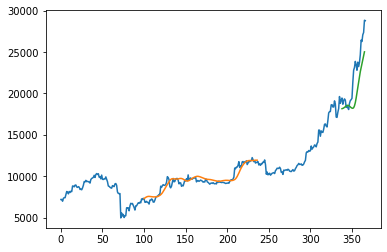

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()